In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [40]:
train_data= pd.read_csv('/content/Train_Data.csv')
test_data= pd.read_csv("/content/Test_Data.csv")

In [41]:
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [42]:
train_data.tail()

,age,sex,bmi,smoker,region,children,charges
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452
3629,37.598865,female,25.219233,no,northeast,3,7027.698968


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [44]:
train_data.shape

(3630, 7)

In [45]:
train_data['smoker'].nunique()

2

In [46]:
train_data['region'].unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

# changing the data in Smoker column from **yes=1 and no=0**
# **male=1 female=0**

In [47]:
train_data['smoker'] =train_data['smoker'].map({'yes': 1,'no':0})

In [48]:
train_data['sex']=train_data['sex'].map({'male':1,'female':0})

In [49]:
train_data['region']=train_data['region'].map({'northwest':0,'northeast':1,'southeast':2,'southwest':3})

In [50]:
train_data.head(20)

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,0,1,2,3279.868550
1,36.976978,0,25.744165,1,2,3,21454.494239
2,18.000000,1,30.030000,0,2,1,1720.353700
3,37.000000,1,30.676891,0,1,3,6801.437542
4,58.000000,1,32.010000,0,2,1,11946.625900
5,46.000000,1,26.620000,0,2,1,7742.109800
6,25.221731,1,31.192647,0,1,4,21736.328145
7,29.486443,0,24.222614,0,0,2,4916.953065
8,26.520494,1,25.065712,0,3,5,5515.809345
9,47.493476,0,27.302013,0,0,3,17009.334987


In [51]:
train_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [52]:
train_data.describe()

,age,sex,bmi,smoker,region,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,0.558953,30.629652,0.154270,1.498623,2.503581,12784.808644
std,12.151029,0.496581,5.441307,0.361257,1.104800,1.712568,10746.166743
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,29.000000,0.000000,26.694526,0.000000,0.000000,1.000000,5654.818262
50%,39.170922,1.000000,30.200000,0.000000,2.000000,3.000000,9443.807222
75%,48.343281,1.000000,34.100000,0.000000,2.000000,4.000000,14680.407505
max,64.000000,1.000000,53.130000,1.000000,3.000000,5.000000,63770.428010


In [53]:
train_data['children'].value_counts()


0    619
2    615
5    610
3    605
4    604
1    577
Name: children, dtype: int64

In [54]:
train_data['smoker'].value_counts()

0    3070
1     560
Name: smoker, dtype: int64

In [55]:
X = train_data.drop(columns='charges')
Y = train_data['charges']

In [56]:
print(X)

            age  sex        bmi  smoker  region  children
0     21.000000    1  25.745000       0       1         2
1     36.976978    0  25.744165       1       2         3
2     18.000000    1  30.030000       0       2         1
3     37.000000    1  30.676891       0       1         3
4     58.000000    1  32.010000       0       2         1
...         ...  ...        ...     ...     ...       ...
3625  48.820767    0  41.426984       0       0         4
3626  38.661977    0  26.202557       0       2         2
3627  56.000000    1  40.300000       0       3         0
3628  48.061207    0  34.930624       0       2         1
3629  37.598865    0  25.219233       0       1         3

[3630 rows x 6 columns]


In [57]:
print(Y)

0        3279.868550
1       21454.494239
2        1720.353700
3        6801.437542
4       11946.625900
            ...     
3625    10987.324964
3626    11735.844352
3627    10602.385000
3628     8976.140452
3629     7027.698968
Name: charges, Length: 3630, dtype: float64


In [58]:
corr = train_data.corr()

<AxesSubplot:>

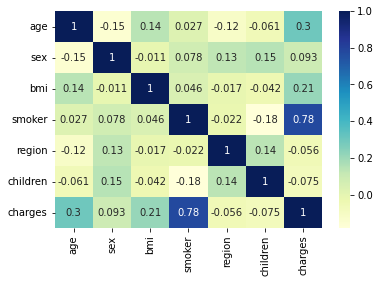

In [59]:
sns.heatmap(corr,annot = True, cmap= 'YlGnBu')

In [60]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=1)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 6) (2904, 6) (726, 6)


In [62]:
print(Y.shape, Y_train.shape, Y_test.shape)

(3630,) (2904,) (726,)


In [63]:
model = LinearRegression()

In [65]:
model.fit(X_train,Y_train)

LinearRegression()

In [73]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[ 8580.29829906 14541.36792734  7023.64941511 ... 12252.65489961
 12073.77326572 35651.49084516]


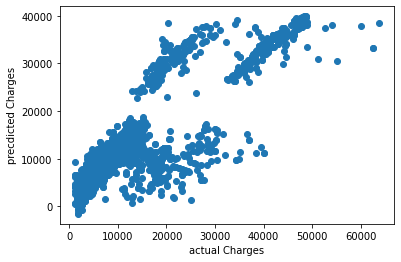

In [76]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("actual Charges")
plt.ylabel("precdicted Charges")
plt.show()

In [83]:
accu3 = metrics.r2_score(Y_train, X_train_prediction)
print("R square accuracy for train data is :  " , accu3)

R square accuracy for train data is :   0.7166012358523046


# SAVING THE MODEL

In [84]:
import pickle

In [88]:
filename = 'Medical_Insurance_trained_model.sav'
pickle.dump(model, open(filename,'wb')) 

In [90]:
loaded_model = pickle.load(open('Medical_Insurance_trained_model.sav','rb'))

In [95]:
input_data = (21,1,25.745,0,1,2)
input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print('the Charges will be : ')
print(prediction)

the Charges will be : 
[3763.69511243]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
